In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from IPython.display import display
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime 
from statsmodels.tsa.stattools import adfuller

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

file_path = r'E:\University of Calgary\M.eng Geomatics\ENGO680_DigitalEngineering\Project\Sub_Division_IMD_2017.csv'
df = pd.read_csv(file_path)
display(df.head())
print(df.columns)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

In [5]:
#Checking for missing values or NaN  
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)
total_missing_values = missing_values.sum()
print("\nTotal missing values in each column:")
print(missing_values)
print(f"\nTotal missing values in the DataFrame: {total_missing_values}")

NameError: name 'df' is not defined

In [44]:
#Replacing missing values using mean
columns_to_fill = df.columns[2:20]
df_filled = df.copy()
df_filled[columns_to_fill] = df[columns_to_fill].replace(0, np.nan).fillna(df[columns_to_fill].mean())

print("After replacing missing values, NaN, and values equal to 0 with mean for selected columns:")
print(df_filled)

After replacing missing values, NaN, and values equal to 0 with mean for selected columns:
                    SUBDIVISION  YEAR        JAN         FEB         MAR  \
0     Andaman & Nicobar Islands  1901  49.200000   87.100000   29.200000   
1     Andaman & Nicobar Islands  1902  18.938337  159.800000   12.200000   
2     Andaman & Nicobar Islands  1903  12.700000  144.000000   27.412912   
3     Andaman & Nicobar Islands  1904   9.400000   14.700000   27.412912   
4     Andaman & Nicobar Islands  1905   1.300000   21.599427    3.300000   
...                         ...   ...        ...         ...         ...   
4183                Lakshadweep  2013  26.200000   34.400000   37.500000   
4184                Lakshadweep  2014  53.200000   16.100000    4.400000   
4185                Lakshadweep  2015   2.200000    0.500000    3.700000   
4186                Lakshadweep  2016  59.600000   12.100000    3.200000   
4187                Lakshadweep  2017  21.300000    0.900000  100.200000 

In [45]:
#Checking for missing values or NaN  
missing_values = df_filled.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)
total_missing_values = missing_values.sum()
print("\nTotal missing values in each column:")
print(missing_values)
print(f"\nTotal missing values in the DataFrame: {total_missing_values}")

Series([], dtype: int64)

Total missing values in each column:
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

Total missing values in the DataFrame: 0


In [46]:
columns_to_convert = df.columns[2:20]
df_filled[columns_to_convert] = df_filled[columns_to_convert] / 10
print("After converting values from millimeters to centimeters: ")
print(df_filled)

After converting values from millimeters to centimeters:
                    SUBDIVISION  YEAR       JAN        FEB        MAR  \
0     Andaman & Nicobar Islands  1901  4.920000   8.710000   2.920000   
1     Andaman & Nicobar Islands  1902  1.893834  15.980000   1.220000   
2     Andaman & Nicobar Islands  1903  1.270000  14.400000   2.741291   
3     Andaman & Nicobar Islands  1904  0.940000   1.470000   2.741291   
4     Andaman & Nicobar Islands  1905  0.130000   2.159943   0.330000   
...                         ...   ...       ...        ...        ...   
4183                Lakshadweep  2013  2.620000   3.440000   3.750000   
4184                Lakshadweep  2014  5.320000   1.610000   0.440000   
4185                Lakshadweep  2015  0.220000   0.050000   0.370000   
4186                Lakshadweep  2016  5.960000   1.210000   0.320000   
4187                Lakshadweep  2017  2.130000   0.090000  10.020000   

            APR    MAY    JUN    JUL    AUG    SEP    OCT    NOV  

In [47]:
#Melting the data
df1 = pd.melt(df_filled, id_vars=['SUBDIVISION', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND', 'YEAR'], value_vars=df_filled.columns[2:15])
df1['Date'] = df1['variable'] + ' ' + df1['YEAR'].astype(str)  
df1.loc[:,'Date'] = df1['Date'].apply(lambda x : datetime.strptime(x, '%b %Y')) #Converting String to datetime object
df1

,SUBDIVISION,ANNUAL,JF,MAM,JJAS,OND,YEAR,variable,value,Date
0,Andaman & Nicobar Islands,337.32,13.63,56.03,169.63,98.03,1901,JAN,4.920000,1901-01-01 00:00:00
1,Andaman & Nicobar Islands,352.07,15.98,45.83,218.59,71.67,1902,JAN,1.893834,1902-01-01 00:00:00
2,Andaman & Nicobar Islands,295.74,15.67,23.61,187.40,69.06,1903,JAN,1.270000,1903-01-01 00:00:00
3,Andaman & Nicobar Islands,307.96,2.41,50.69,197.76,57.10,1904,JAN,0.940000,1904-01-01 00:00:00
4,Andaman & Nicobar Islands,256.67,0.13,30.97,162.49,63.08,1905,JAN,0.130000,1905-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
50251,Lakshadweep,142.63,6.06,13.11,105.70,17.76,2013,DEC,2.670000,2013-12-01 00:00:00
50252,Lakshadweep,139.50,6.93,7.67,95.85,29.05,2014,DEC,6.230000,2014-12-01 00:00:00
50253,Lakshadweep,164.29,0.27,22.39,86.09,55.54,2015,DEC,15.900000,2015-12-01 00:00:00
50254,Lakshadweep,106.57,7.17,8.32,74.54,16.54,2016,DEC,7.470000,2016-12-01 00:00:00


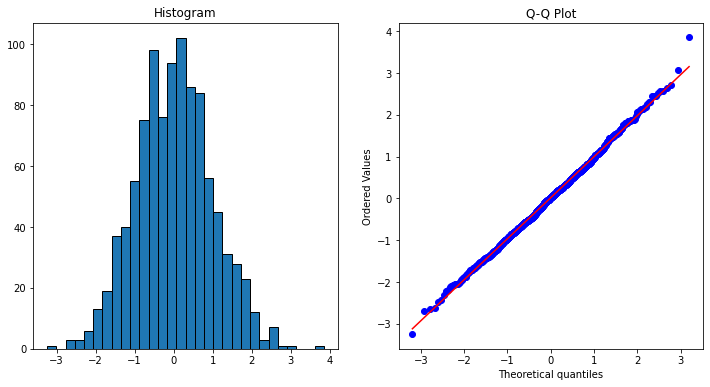

Shapiro-Wilk Test - Statistic: 0.9986080527305603, p-value: 0.6264819502830505
Anderson-Darling Test - Statistic: 0.3474697767348971, Critical Values: [0.574 0.653 0.784 0.914 1.088]


In [110]:
from scipy import stats


np.random.seed(42)
df1 = np.random.normal(size=1000)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df1, bins=30, edgecolor='black')
plt.title('Histogram')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df1, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df1)
print(f'Shapiro-Wilk Test - Statistic: {stat}, p-value: {p_value}')

# Anderson-Darling test for normality
result = stats.anderson(df1)
print(f'Anderson-Darling Test - Statistic: {result.statistic}, Critical Values: {result.critical_values}')

In [2]:
conda install seaborn matplotlib


^C

Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::aiohttp==3.8.1=py39h2bbff1b_1
  - defaults/win-64::anaconda==2022.05=py39_0
  - defaults/win-64::anaconda-client==1.9.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.1.4=py39haa95532_0
  - defaults/noarch::anaconda-project==0.10.2=pyhd3eb1b0_0
  - defaults/win-64::anyio==3.5.0=py39haa95532_0
  - defaults/win-64::astropy==5.0.4=py39h080aedc_0
  - defaults/noarch::binaryornot==0.4.4=pyhd3eb1b0_1
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/win-64::bokeh==2.4.2=py39haa95532_0
  - defaults/noarch::boto3==1.21.32=pyhd3eb1b0_0
  - defaults/noarch::botocore==1.24.32=pyhd3eb1b0_0
  - defaults/win-64::bottleneck==1.3.4=py39h080aedc_0
  - defaults/noarch::colorcet==2.0.6=pyhd3eb1b0_0
  - conda-forge/win-64::conda==4.14.0=py39hcbf5309_0
  - defaults/win-64::conda-build==3.21.8=py39haa95532_2
  - defaults/noarch::conda-r

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Timo\anaconda3

  added / updated specs:
    - matplotlib
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.10  |           py39_2          68 KB
    anaconda-custom            |           py39_2          13 KB
    brotli-python-1.0.9        |   py39hd77b12b_7         309 KB
    ca-certificates-2023.08.22 |       haa95532_0         123 KB
    certifi-2023.11.17         |   py39haa95532_0         159 KB
    fftw-3.3.9                 |       h2bbff1b_1         672 KB
    idna-3.4                   |   py39haa95532_0          93 KB
    joblib-1

In [1]:
pip install --seaborn


Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\Timo\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\Timo\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\Timo\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\Timo\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\Timo\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --seaborn


In [107]:
selected_columns = df.columns[2:14]
num_cols = len(selected_columns)
num_rows = (num_cols // 3) + (num_cols % 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(selected_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

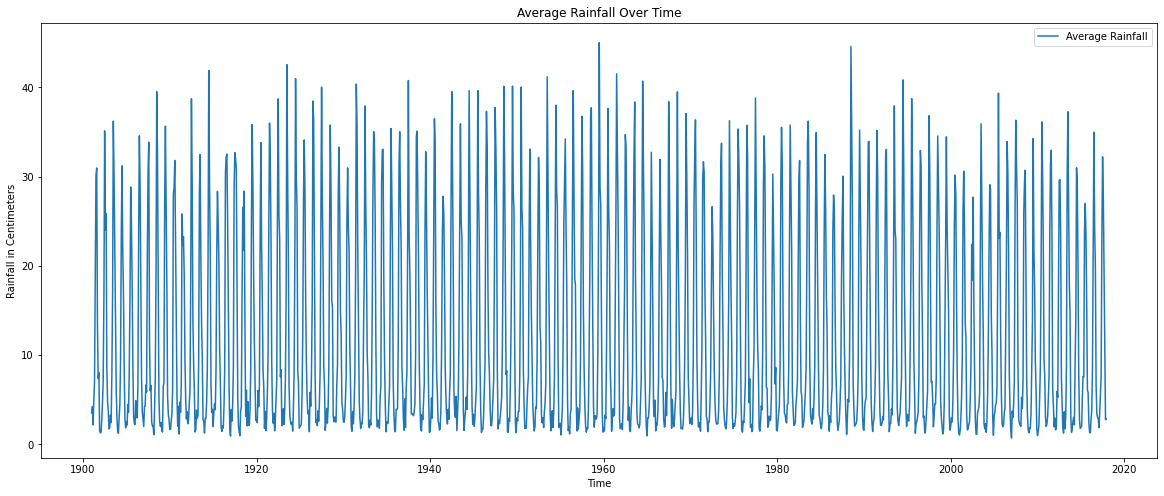

In [49]:
df1.columns=['Subdivision', 'Annual', 'JF', 'MAM', 'JJAS', 'OND', 'Year', 'Month', 'Rainfall', 'Date']

df1['Date'] = pd.to_datetime(df1['Date'])
df_grouped = df1.groupby('Date')['Rainfall'].mean().reset_index()

date_array = df_grouped['Date'].values.astype(np.datetime64)
rainfall_array = df_grouped['Rainfall'].values

plt.figure(figsize=(20, 8))
plt.plot(date_array, rainfall_array, label='Average Rainfall')
plt.title('Average Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall in Centimeters')
plt.legend()
plt.show()


In [50]:
#testing stationary of this time series data
result = adfuller(df_grouped['Rainfall'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -5.190233703041845
p-value: 9.204830689118891e-06
Critical Values: {'1%': -3.4351009168670035, '5%': -2.863638180853028, '10%': -2.5678870681532424}
The time series is stationary.


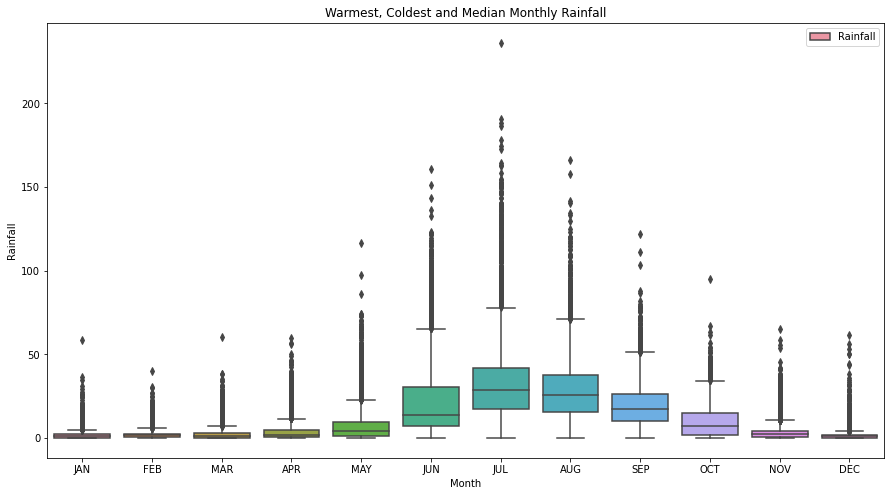

In [51]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month', y='Rainfall', data=df1)
plt.title('Warmest, Coldest and Median Monthly Rainfall')
plt.legend(labels=['Rainfall'])
plt.show()

In [52]:
#df['Yearly Mean'] = df.iloc[:,1:].mean(axis=1) 
#df['Yearly Mean'] = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis=1) 
df_filled['Yearly Mean'] = df_filled.groupby('YEAR')[columns_to_fill].transform('mean').mean(axis=1)
df_filled_sorted = df_filled.sort_values('YEAR')
fig = go.Figure(data=[
    go.Scatter(name='Yearly Rainfall', x=df_filled_sorted['YEAR'], y=df_filled_sorted['Yearly Mean'], mode='lines', line=dict(color='blue')),
    go.Scatter(name='Yearly Rainfall', x=df_filled_sorted['YEAR'], y=df_filled_sorted['Yearly Mean'], mode='markers', marker=dict(color='red'))
])
fig.update_layout(title='Yearly Mean Rainfall:', xaxis_title='Time', yaxis_title='Rainfall in CM')
fig.show()

fig = px.scatter(df_filled_sorted,x = 'YEAR', y = 'Yearly Mean', trendline = 'lowess')
fig.update_layout(title='Trendline Over The Years :', xaxis_title='Time', yaxis_title='Rainfall in CM')
fig.show()

In [53]:
fig = px.bar(df_filled, x='SUBDIVISION', y='ANNUAL', 
             title='Annual Rainfall by Subdivision',
             labels={'ANNUAL': 'Annual Rainfall (CM)'},
             height=400)

fig.update_layout(xaxis_title='Subdivision', yaxis_title='Annual Rainfall (CM)')
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1, opacity=0.7)

fig.show()

'''plt.figure(figsize=(12, 6))
plt.bar(df_filled['SUBDIVISION'], df_filled['ANNUAL'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Annual Rainfall by Subdivision')
plt.xlabel('Subdivision')
plt.ylabel('Annual Rainfall (CM)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()'''

"plt.figure(figsize=(12, 6))\nplt.bar(df_filled['SUBDIVISION'], df_filled['ANNUAL'], color='skyblue', edgecolor='black', alpha=0.7)\nplt.title('Annual Rainfall by Subdivision')\nplt.xlabel('Subdivision')\nplt.ylabel('Annual Rainfall (CM)')\nplt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility\nplt.show()"

In [3]:
from sklearn.model_selection import GridSearchCV

# Define an extended parameter grid
param_grid = {
    'max_depth': [None, 40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create the Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', verbose=1)

# Split the data into features (X) and target variable (y)
y = df2['Rainfall']
X = df2.drop(columns='Rainfall')

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_dtr = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_dtr.fit(train_x, train_y)

# Make predictions and evaluate
pred = best_dtr.predict(test_x)
print("Decision Tree Score:", r2_score(test_y, pred))

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

In [96]:

random_state = 0

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

df2 = df1[['Year', 'Month', 'Rainfall']].copy()
df2 = pd.get_dummies(df2)
y = df2[['Rainfall']]
X = df2.drop(columns='Rainfall')


param_grid_dt = {
    'max_depth': [40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}


dtr = DecisionTreeRegressor(random_state=random_state)


grid_search_dt = GridSearchCV(
    dtr,
    param_grid=param_grid_dt,
    scoring='r2',
    cv=8,  
    verbose=1,
    n_jobs=-1,  
)


grid_search_dt.fit(X, y)

print("Decision Tree Regressor Parameters:")
for param, value in grid_search_dt.best_estimator_.get_params(deep=True).items():
    print(f"'{param}': {value},")
print("______________________________________________________________________")

best_dtr = grid_search_dt.best_estimator_

kf = KFold(n_splits=8, random_state=random_state, shuffle=True)
fold_number_dt = 1
results_dt = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_dtr.fit(X_train, y_train)
    y_pred_train = best_dtr.predict(X_train)
    y_pred_test = best_dtr.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    results_dt.append([fold_number_dt, round(r2_train, 3), round(mse_train, 3), round(r2_test, 3), round(mse_test, 3)])
    fold_number_dt += 1

print("_" * 70)
print("Fold\tTrain R-Squared\t\tTrain MSE\tTest R-Squared\tTest MSE")
for result_dt in results_dt:
    print("\t\t".join([str(val) for val in result_dt]))
print("______________________________________________________________________")

mean_train_r2_dt = np.mean([result_dt[1] for result_dt in results_dt])
std_train_r2_dt = np.std([result_dt[1] for result_dt in results_dt])
mean_train_mse_dt = np.mean([result_dt[2] for result_dt in results_dt])
std_train_mse_dt = np.std([result_dt[2] for result_dt in results_dt])
mean_test_r2_dt = np.mean([result_dt[3] for result_dt in results_dt])
std_test_r2_dt = np.std([result_dt[3] for result_dt in results_dt])
mean_test_mse_dt = np.mean([result_dt[4] for result_dt in results_dt])
std_test_mse_dt = np.std([result_dt[4] for result_dt in results_dt])

print(f"Mean Train R-Squared Score (Decision Tree): {mean_train_r2_dt:.3f} ± {std_train_r2_dt:.3f}")
print(f"Mean Train MSE Score (Decision Tree): {mean_train_mse_dt:.3f} ± {std_train_mse_dt:.3f}")
print(f"Mean Test R-Squared Score (Decision Tree): {mean_test_r2_dt:.3f} ± {std_test_r2_dt:.3f}")
print(f"Mean Test MSE Score (Decision Tree): {mean_test_mse_dt:.3f} ± {std_test_mse_dt:.3f}")
print("_" * 70)

Fitting 8 folds for each of 240 candidates, totalling 1920 fits
Decision Tree Regressor Parameters:
'ccp_alpha': 0.0,
'criterion': squared_error,
'max_depth': 40,
'max_features': sqrt,
'max_leaf_nodes': None,
'min_impurity_decrease': 0.0,
'min_samples_leaf': 1,
'min_samples_split': 2,
'min_weight_fraction_leaf': 0.0,
'random_state': 0,
'splitter': best,
______________________________________________________________________
______________________________________________________________________
Fold	Train R-Squared		Train MSE	Test R-Squared	Test MSE
1		0.426		176.073		0.386		185.671
2		0.425		177.701		0.392		173.604
3		0.425		175.953		0.397		186.133
4		0.427		176.74		0.375		180.823
5		0.427		174.644		0.381		195.393
6		0.425		175.744		0.393		187.565
7		0.426		175.394		0.386		190.336
8		0.427		173.658		0.383		203.002
______________________________________________________________________
Mean Train R-Squared Score (Decision Tree): 0.426 ± 0.001
Mean Train MSE Score (Decision Tree): 175.738 

In [102]:
next_Year_dt = df1[df1['Year']==2017][['Year', 'Month']]
next_Year_dt.Year.replace(2017,2018, inplace=True)
next_Year_dt= pd.get_dummies(next_Year_dt)
temp_2018_dt = best_dtr.predict(next_Year_dt)

temp_2018_dt = {'Month':df1['Month'].unique(), 'Rainfall':temp_2018_dt}
#temp_2018_dt=pd.DataFrame(temp_2018_dt)
temp_2018_dt['Year'] = 2018
temp_2018_dt

{'Month': array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
        'OCT', 'NOV', 'DEC'], dtype=object),
 'Rainfall': array([ 1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.86590329,  1.86590329,  1.86590329,  1.86590329,
         1.86590329,  1.88204524,  1.88204524,  1.88204524,  1.88204524,
         1.88204524,  1.88204524,  1.88204524,  1.88204524,  1.88204524,
         1.88204524,  1.88204524,  1.88204524,  1.88204524,  1.88204524,
         1.88204524,  1.88204524,  1.88204524,  1.88204524,  1.88204524,
         1.88204524,  1.88204524,  1.88204524,  1.88204524, 

In [77]:
next_Year_dt = df1[df1['Year'] == 2017][['Year', 'Month', 'Subdivision']]
next_Year_dt['Year'].replace(2017, 2018, inplace=True)
next_Year_dt = pd.get_dummies(next_Year_dt)
temp_2018_dt = best_dtr.predict(next_Year_dt)
months_unique = df1['Month'].unique()


num_subdivisions = len(df1['Subdivision'].unique())
temp_2018_dt = ({
    'Month': np.tile(months_unique, num_subdivisions),
    'Subdivision': np.repeat(df1['Subdivision'].unique(), len(months_unique)),
    'Rainfall': np.repeat(temp_2018_dt, num_subdivisions)
})

temp_2018_dt['Year'] = 2018
print(temp_2018_dt)

{'Month': array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR',
       'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
       'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR',
       'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
       'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR',
       'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
       'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JU

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=0)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', verbose=1)

y_rf = df2['Rainfall']
X_rf = df2.drop(columns='Rainfall')

grid_search_rf.fit(X_rf, y_rf)

best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

print("Best Parameters (Random Forest):", best_params_rf)

best_rf.fit(train_x, train_y)

pred_rf = best_rf.predict(test_x)
print("Random Forest Score:", r2_score(test_y, pred_rf))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters (Random Forest): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Score: 0.8120930355498653


In [94]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pandas as pd


param_grid_xgb = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}


xgb = XGBRegressor(random_state=0)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2', verbose=1)

y_xgb = df2['Rainfall']
X_xgb = df2.drop(columns='Rainfall')

grid_search_xgb.fit(X_xgb, y_xgb)

best_params_xgb = grid_search_xgb.best_params_
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters (XGBRegressor):", best_params_xgb)

best_xgb.fit(train_x, train_y)

pred_xgb = best_xgb.predict(test_x)
print("XGBRegressor Score:", r2_score(test_y, pred_xgb))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (XGBRegressor): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
XGBRegressor Score: 0.8223881736210458
